 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [37]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
whale_returns = Path("Resources/whale_returns.csv")
whale_df = pd.read_csv("Resources/whale_returns.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")

In [38]:
# Count nulls
whale_df.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [10]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [12]:
# Reading algorithmic returns
algo_path = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv("Resources/algo_returns.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [15]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [18]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [21]:
# Reading S&P 500 Closing Prices
spx_path = Path("Resources/sp500_history.csv")
spx_df = pd.read_csv("Resources/sp500_history.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")

In [22]:
# Check Data Types
spx_df.dtypes

Close    object
dtype: object

In [23]:
# Fix Data Types
spx_df2 = spx_df['Close'].str.removeprefix("$").to_frame().astype(float)

In [47]:
# Calculate Daily Returns
spx_df2 = spx_df2.pct_change()

In [48]:
# Drop nulls
spx_df2.dropna(inplace=True)

In [49]:
# Rename `Close` Column to be specific to this portfolio.
spx_df2.columns = ["SPX"]

## Combine Whale, Algorithmic, and S&P 500 Returns

In [53]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_df, algo_df, spx_df2], join= "inner", axis = 1)

---

In [213]:
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

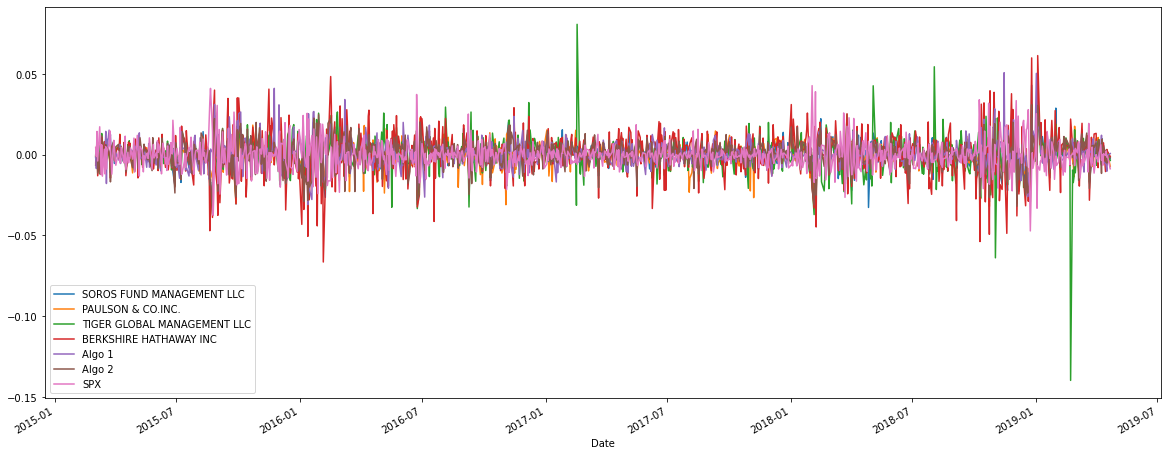

In [56]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize = (20,8))

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

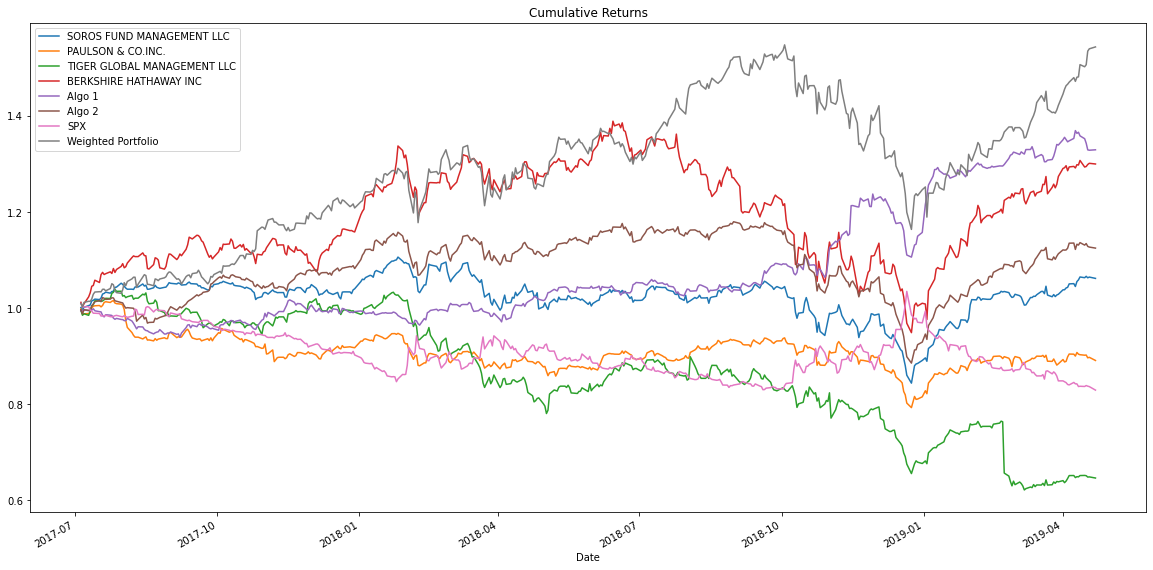

In [408]:
# Calculate cumulative returns of all portfolios

cumulative_returns = (1+combined_returns).cumprod()

# Plot cumulative returns

cumulative_returns.plot(figsize = (20,10), title = "Cumulative Returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

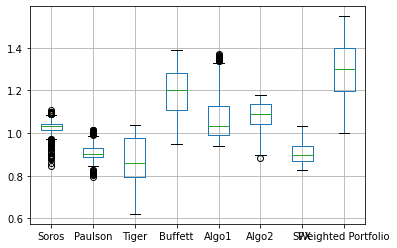

In [414]:
# Box plot to visually show risk
cumulative_returns.columns = ["Soros", "Paulson", "Tiger", "Buffett", "Algo1", "Algo2", "SPX", "Weighted Portfolio"]
cumulative_returns.boxplot()

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
std_def_portfolio = cumulative_returns.std()
std_def_portfolio

Soros      0.073187
Paulson    0.088447
Tiger      0.149652
Buffett    0.241382
Algo1      0.231772
Algo2      0.131642
SPX        0.114846
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [374]:
# Calculate  the daily standard deviation of S&P 500
SPX_STDEV = std_def_portfolio.loc["SPX"]
print("Daily std dev of SPX: " + str(SPX_STDEV))


# Determine which portfolios are riskier than the S&P 500
spx_stddev = std_def_portfolio["SPX"]
index = 0

for risk in std_def_portfolio: 
    if risk == spx_stddev:
        print(f"{std_def_portfolio.index[index]} Portfolio has an equal risk as S&P500")
    elif risk > spx_stddev:
        print(f"{std_def_portfolio.index[index]} Portfolio has more risk than S&P500")
    elif risk < spx_stddev:
        print(f"{std_def_portfolio.index[index]} Portfolio has less risk than S&P500")
    index +=1

Daily std dev of SPX: 0.114846040967005
Soros Portfolio has less risk than S&P500
Paulson Portfolio has less risk than S&P500
Tiger Portfolio has more risk than S&P500
Buffett Portfolio has more risk than S&P500
Algo1 Portfolio has more risk than S&P500
Algo2 Portfolio has more risk than S&P500
SPX Portfolio has an equal risk as S&P500


### Calculate the Annualized Standard Deviation

In [72]:
# Calculate the annualized standard deviation (252 trading days)
std_def_portfolio* np.sqrt(252)

Soros      1.161806
Paulson    1.404053
Tiger      2.375658
Buffett    3.831820
Algo1      3.679263
Algo2      2.089756
SPX        1.823124
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling standard deviation'}, xlabel='Date'>

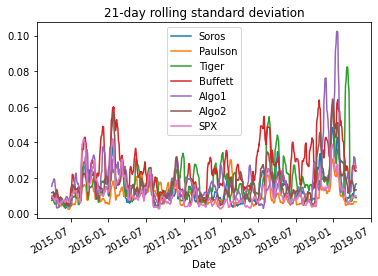

In [375]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

rolling_std_dev = cumulative_returns.rolling(window = 21).std()

# Plot the rolling standard deviation

rolling_std_dev.plot(title = "21-day rolling standard deviation")

### Calculate and plot the correlation

<AxesSubplot:>

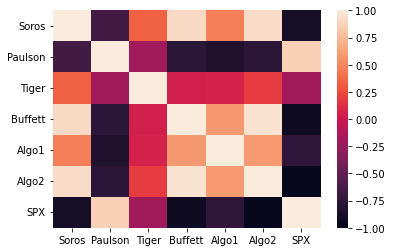

In [81]:
# Calculate the correlation

portfolio_correlation = cumulative_returns.corr()

# Display de correlation matrix
sns.heatmap(portfolio_correlation, vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'50-day rolling beta for algo1'}, xlabel='Date'>

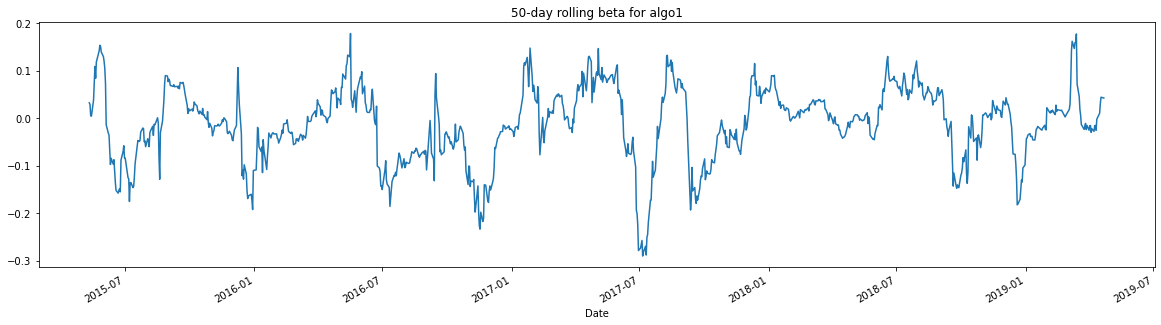

In [377]:
# Calculate covariance of a single portfolio
rolling_covariance_of_algo1 = algo_df["Algo 1"].rolling(window = 50).cov(SPX)

# Calculate variance of S&P 500

SPX = cumulative_returns["SPX"]

SPX_variance = SPX.rolling(window = 50).var()

# Computing beta

beta = rolling_covariance_of_algo1 / SPX_variance

# Plot beta trend
beta.plot(figsize = (20,5), title = "50-day rolling beta for algo1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [104]:
# Use `ewm` to calculate the rolling window

cumulative_returns.std().ewm(halflife = 21).mean()


Soros      0.073187
Paulson    0.080943
Tiger      0.104606
Buffett    0.140511
Algo1      0.159988
Algo2      0.154865
SPX        0.148567
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [173]:
# Annualized Sharpe Ratios

sharpe_ratio = (combined_returns.mean() - combined_returns["SPX"].mean()) / (combined_returns.std())

<AxesSubplot:title={'center':'Sharpe Ratios'}>

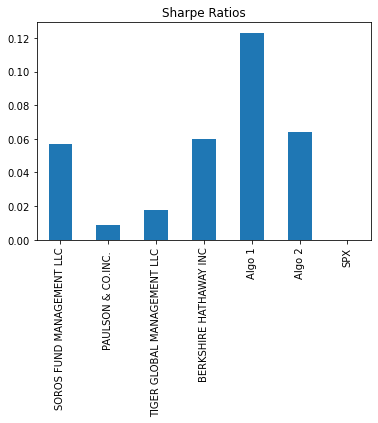

In [378]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind = "bar", title = "Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

 

In [385]:
algo1_return = sharpe_ratio["Algo 1"]
index = 0

for performance in sharpe_ratio:
    if sharpe_ratio.index[index] == "Algo 1":
        continue
    if performance == algo1_return:
        print(f"Algo1 equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < algo1_return:
        print(f"Algo1 outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > algo1_return:
        print(f"Algo1 underperformed compared to {combined_returns.columns[index]} portfolio")
    index +=1

Algo1 outperfomed SOROS FUND MANAGEMENT LLC portfolio
Algo1 outperfomed PAULSON & CO.INC.  portfolio
Algo1 outperfomed TIGER GLOBAL MANAGEMENT LLC portfolio
Algo1 outperfomed BERKSHIRE HATHAWAY INC portfolio


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [292]:
# Reading data from 1st stock

aapl_df = pd.read_csv("Resources/AAPL.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
aapl_df.drop(columns= ["Open", "High", "Low", "Close", "Volume"], inplace=True)
aapl_df.columns = ["AAPL"]

In [293]:
# Reading data from 2nd stock
msft_df = pd.read_csv("Resources/MSFT.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
msft_df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
msft_df.columns = ["MSFT"]

In [297]:
# Reading data from 3rd stock
jpm_df = pd.read_csv("Resources/JPM.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
jpm_df.drop(columns=["Open", "High", "Low", "Close", "Volume"], inplace=True)
jpm_df.columns = ["JPM"]

In [313]:
# Combine all stocks in a single DataFrame
megacap_portfolio = pd.concat([aapl_df, msft_df, jpm_df], axis = 1, join = "inner")

In [265]:
# Reset Date index
# see above

In [300]:
# Reorganize portfolio data by having a column per symbol
# see above

In [322]:
# Calculate daily returns
megacap_returns = megacap_portfolio.pct_change()


# Drop NAs
megacap_returns.dropna(inplace=True)
# Display sample data
megacap_returns


,AAPL,MSFT,JPM
Date,,,
2017-07-05,0.004111,0.013349,0.010027
2017-07-06,-0.009439,-0.007383,-0.003202
2017-07-07,0.010159,0.012979,0.005033
2017-07-10,0.006103,0.007486,-0.007033
2017-07-11,0.003240,0.000143,-0.003863
...,...,...,...
2022-06-27,0.000000,-0.010497,-0.008012
2022-06-28,-0.029790,-0.031749,-0.004812
2022-06-29,0.013024,0.014738,-0.004490


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Date'>

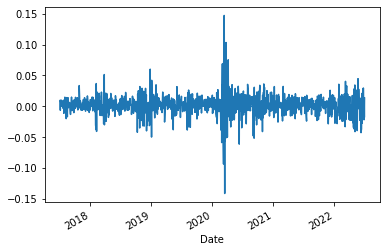

In [386]:
# Set weights
weights = [1/3, 1/3, 1/3]

aapl_weight = 0.333
msft_weight = 0.333
jpm_weight = 0.333

# Calculate portfolio return

weighted_portfolio_returns = (aapl_weight*megacap_returns["AAPL"])+ (msft_weight*megacap_returns["MSFT"]) + (jpm_weight*megacap_returns["JPM"])

# Display sample data

weighted_portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [338]:
# Join your returns DataFrame to the original returns DataFrame

combined_returns["Weighted Portfolio"] = weighted_portfolio_returns

In [341]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns.dropna(inplace=True)
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX,Weighted Portfolio
Date,,,,,,,,
2017-07-05,0.001118,-0.002004,-0.004739,0.011768,-0.006434,-0.003639,0.009457,0.009153
2017-07-06,-0.005274,-0.010280,-0.010405,-0.009476,0.001909,-0.008633,-0.006362,-0.006668
2017-07-07,0.005680,0.000239,0.003120,0.006719,0.000927,0.008702,-0.000927,0.009381
2017-07-10,0.003550,0.000547,-0.003178,0.014204,-0.002043,-0.001211,0.000783,0.002184
2017-07-11,0.001230,0.002412,0.009061,0.008142,0.001447,-0.000231,-0.007253,-0.000160
...,...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,-0.002925
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.002777
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.018833


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [342]:
# Calculate the annualized `std`
weighted_portfolio_returns.std()*np.sqrt(252)

0.26033610307678545

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

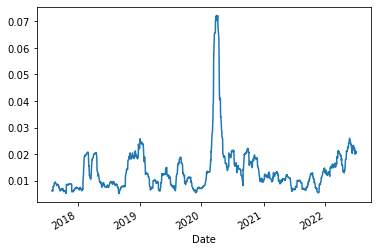

In [345]:
# Calculate rolling standard deviation
rolling_std_dev = weighted_portfolio_returns.rolling(window = 21).std()
# Plot rolling standard deviation
rolling_std_dev.plot()

### Calculate and plot the correlation

In [356]:
# Calculate and plot the correlation
combined_correlations = combined_returns.corr()
combined_correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPX,Weighted Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.718636,0.509227,0.768044,0.306615,0.807724,0.011510,0.699638
PAULSON & CO.INC.,0.718636,1.000000,0.470472,0.586108,0.319897,0.738058,-0.014618,0.578866
TIGER GLOBAL MANAGEMENT LLC,0.509227,0.470472,1.000000,0.368885,0.130729,0.471365,-0.018523,0.458941
BERKSHIRE HATHAWAY INC,0.768044,0.586108,0.368885,1.000000,0.295626,0.755950,-0.029576,0.773041
Algo 1,0.306615,0.319897,0.130729,0.295626,1.000000,0.304862,-0.051969,0.261676
Algo 2,0.807724,0.738058,0.471365,0.755950,0.304862,1.000000,-0.021284,0.753657
SPX,0.011510,-0.014618,-0.018523,-0.029576,-0.051969,-0.021284,1.000000,0.037222
Weighted Portfolio,0.699638,0.578866,0.458941,0.773041,0.261676,0.753657,0.037222,1.000000


<AxesSubplot:>

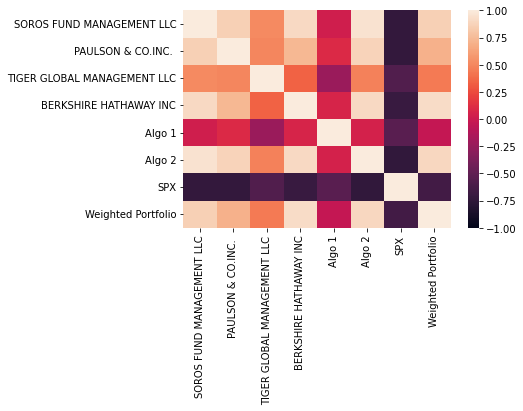

In [357]:
sns.heatmap(combined_correlations.corr(), vmin = -1, vmax =1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60-day rolling beta of weighted portfolio'}, xlabel='Date'>

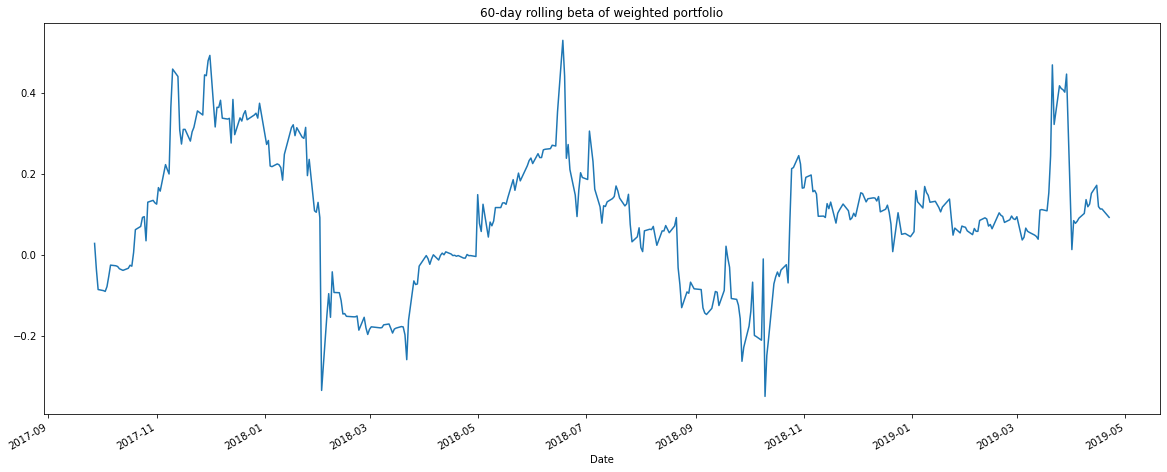

In [391]:
# Calculate and plot Beta

covariance = combined_returns["Weighted Portfolio"].rolling(window=60).cov(combined_returns["SPX"])
variance = combined_returns["SPX"].rolling(window=60).var()

weighted_portfolio_beta = covariance / variance
weighted_portfolio_beta.plot(figsize=(20,8), title= "60-day rolling beta of weighted portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [394]:
# Calculate Annualized Sharpe Ratios

combined_sharpe_ratio = ((combined_returns.mean()-combined_returns["SPX"].mean())*252) / (combined_returns.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratios'}>

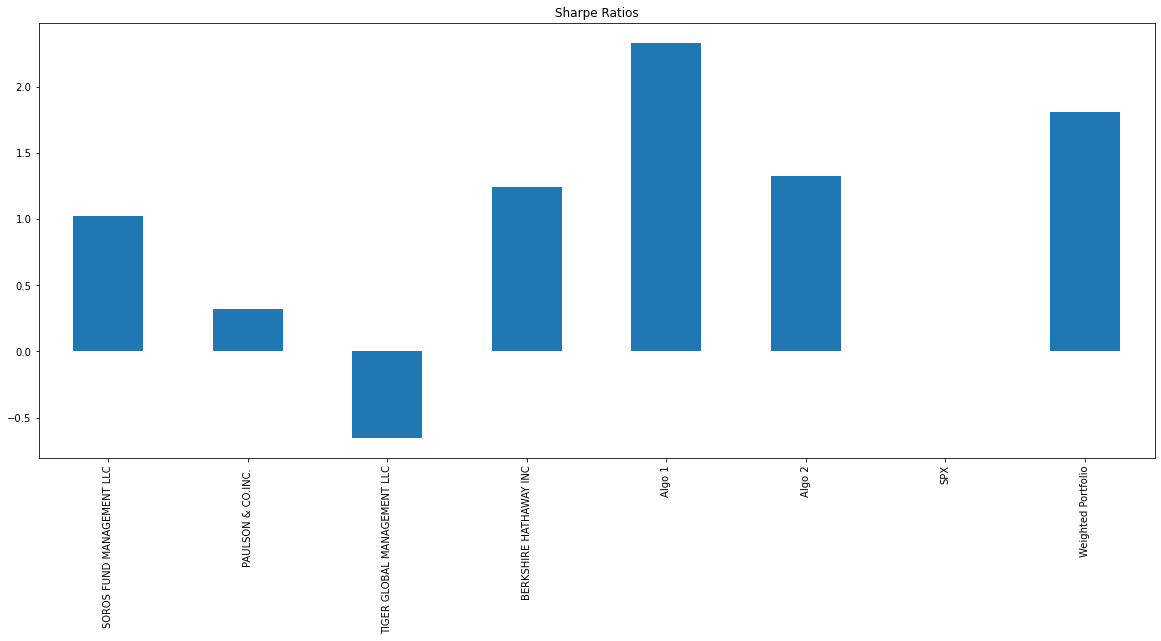

In [398]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratio.plot(kind ="bar", figsize = (20,8), title = "Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [407]:
index = 0
weighted_performance = combined_sharpe_ratio["Weighted Portfolio"]

for performance in combined_sharpe_ratio:
    if combined_sharpe_ratio.index[index] == "Weighted Portfolio":
        continue
    if performance == "Weighted Portfolio":
         print(f"Weighted portfolio equally performed compared to {combined_returns.columns[index]} portfolio")
    elif performance < weighted_performance:
        print(f"Weighted portfolio outperfomed {combined_returns.columns[index]} portfolio")
    elif performance > weighted_performance:
        print(f"Weighted portfolio underperformed compared to {combined_returns.columns[index]} portfolio")
    index+=1

Weighted portfolio outperfomed SOROS FUND MANAGEMENT LLC portfolio
Weighted portfolio outperfomed PAULSON & CO.INC.  portfolio
Weighted portfolio outperfomed TIGER GLOBAL MANAGEMENT LLC portfolio
Weighted portfolio outperfomed BERKSHIRE HATHAWAY INC portfolio
Weighted portfolio underperformed compared to Algo 1 portfolio
Weighted portfolio outperfomed Algo 2 portfolio
Weighted portfolio outperfomed SPX portfolio
